In [118]:
import pandas as pd

df = pd.read_csv('wdbc.csv')


In [112]:
import seaborn as sns
target = df['M'].map({'B':0, 'M':1})
target_labels = ['Benigno', 'Maligno']


KeyError: 'M'

<Axes: xlabel='M', ylabel='count'>

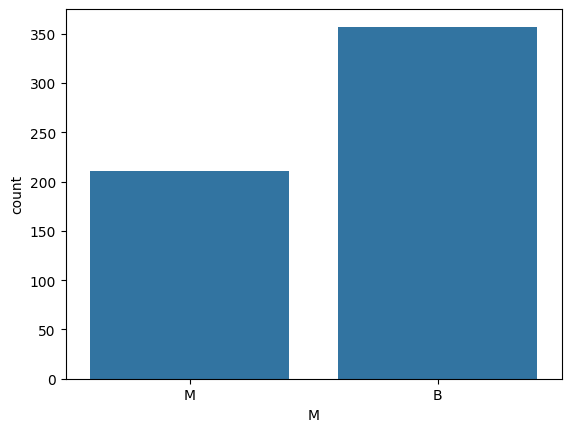

In [119]:
sns.countplot(x = df['M'])

In [99]:
df.drop(columns=['842302', 'M'],inplace=True)

In [100]:
df.head()

,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave_points_mean
...
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave_points_worst
symmetry_worst
fractal_dimension_worst

In [101]:
values = df.to_numpy()
values.shape

(568, 30)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

values = scaler.fit_transform(values)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(values, target, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model_logistic = LogisticRegression()
#model = DecisionTreeClassifier()
model_random = RandomForestClassifier()

model_logistic.fit(X_train, y_train)
predictions_test_logistic = model_logistic.predict(X_test)

model_random.fit(X_train, y_train)
predictions_test_random = model_random.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

performances_logistic = classification_report(y_test, predictions_test_logistic, target_names=target_labels)
print('Classification report LOGISTIC REGRESSION:')
print(performances_logistic)

performances_random = classification_report(y_test, predictions_test_random, target_names=target_labels)
print('Classification report RANDOM FOREST:')
print(performances_random)

Classification report LOGISTIC REGRESSION:
              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        68
     Maligno       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Classification report RANDOM FOREST:
              precision    recall  f1-score   support

     Benigno       0.96      1.00      0.98        68
     Maligno       1.00      0.93      0.97        46

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix LOGISTIC REGRESSION
[[67  1]
 [ 3 43]]


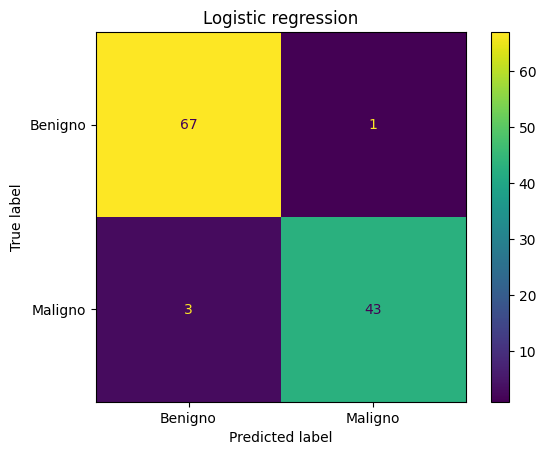

Confusion Matrix RANDOM FOREST
[[68  0]
 [ 3 43]]


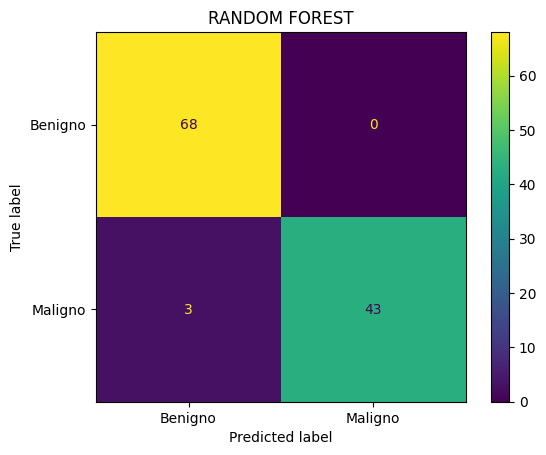

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Matrice di confusione
matrix_l = confusion_matrix(y_test, predictions_test_logistic)
print('Confusion Matrix LOGISTIC REGRESSION')
print(matrix_l)
#visualizzazione matrice
visual = ConfusionMatrixDisplay(matrix_l, display_labels=target_labels)
visual.plot()
plt.title('Logistic regression')
plt.show()

#Matrice di confusione
matrix_r = confusion_matrix(y_test, predictions_test_random)
print('Confusion Matrix RANDOM FOREST')
print(matrix_r)
#visualizzazione matrice
visual = ConfusionMatrixDisplay(matrix_r, display_labels=target_labels)
visual.plot()
plt.title('RANDOM FOREST')
plt.show()

C:\Users\perri\AppData\Local\Temp\ipykernel_940\2139147033.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=names, palette='viridis')


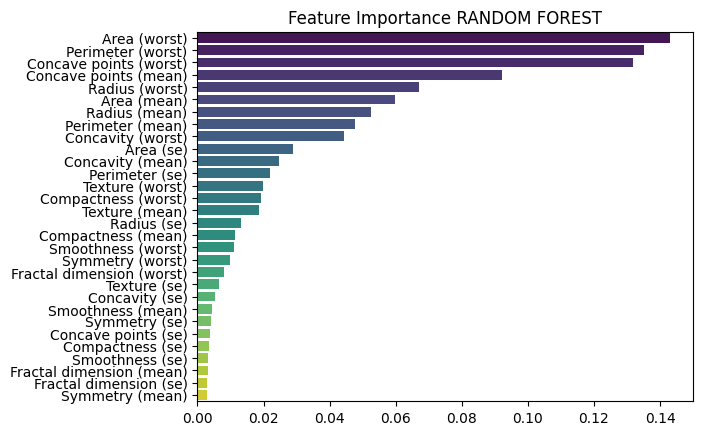

In [110]:
import numpy as np
import seaborn as sns
# Creazione della lista di stringhe
feature_names = [
    "Radius (mean)",
    "Texture (mean)",
    "Perimeter (mean)",
    "Area (mean)",
    "Smoothness (mean)",
    "Compactness (mean)",
    "Concavity (mean)",
    "Concave points (mean)",
    "Symmetry (mean)",
    "Fractal dimension (mean)",
    "Radius (se)",
    "Texture (se)",
    "Perimeter (se)",
    "Area (se)",
    "Smoothness (se)",
    "Compactness (se)",
    "Concavity (se)",
    "Concave points (se)",
    "Symmetry (se)",
    "Fractal dimension (se)",
    "Radius (worst)",
    "Texture (worst)",
    "Perimeter (worst)",
    "Area (worst)",
    "Smoothness (worst)",
    "Compactness (worst)",
    "Concavity (worst)",
    "Concave points (worst)",
    "Symmetry (worst)",
    "Fractal dimension (worst)"
]


importances = model_random.feature_importances_

indices = np.argsort(importances)[::-1]

names = [feature_names[i] for i in indices]

plt.title("Feature Importance RANDOM FOREST")
sns.barplot(x=importances[indices], y=names, palette='viridis') 
plt.show()

# %%
# import seaborn as sns


# sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
# plt.title('Importanza delle Feature nel random tree')
# plt.xlabel('Importanza')
# plt.ylabel('Feature')
# plt.show()



C:\Users\perri\AppData\Local\Temp\ipykernel_940\3462291655.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


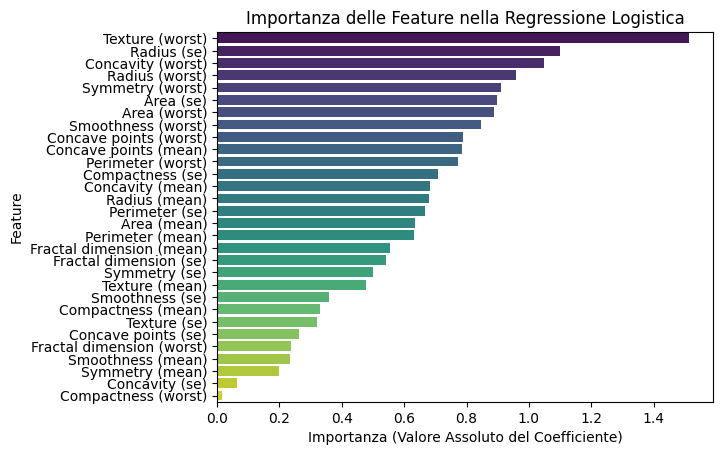

In [108]:
# Ottieni i coefficienti del modello
coefficients = model_logistic.coef_[0]


# Crea un DataFrame per visualizzare i coefficienti e le feature
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Importance'] = importance_df['Coefficient'].abs()  # Importanza come valore assoluto

# Ordina il DataFrame per importanza
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importanza delle Feature nella Regressione Logistica')
plt.xlabel('Importanza (Valore Assoluto del Coefficiente)')
plt.ylabel('Feature')
plt.show()